-1.0
-0.5
0.0
0.5
1.0


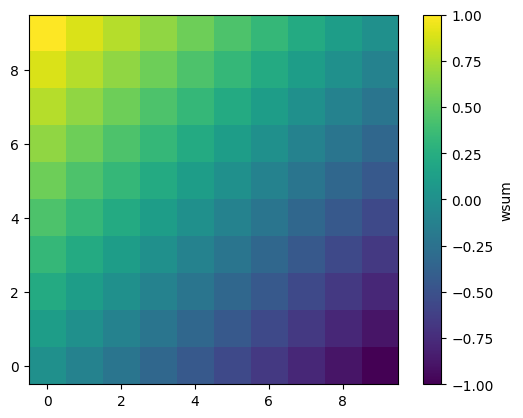

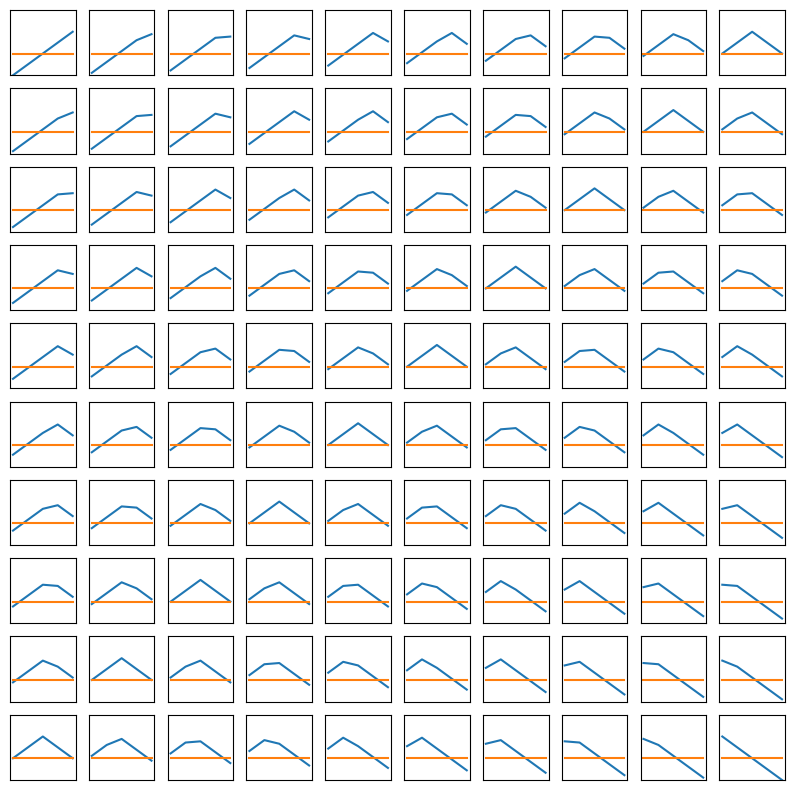

In [98]:
import matplotlib.pyplot as plt
import numpy as np


def rescale_heat(h, beta1, beta2, fmin, fmax, hmin, hmax):
    wsum_min = np.minimum(beta1 * fmin, beta1 * fmax) + np.minimum(beta2 * fmin, beta2 * fmax)
    wsum_max = np.maximum(beta1 * fmin, beta1 * fmax) + np.maximum(beta2 * fmin, beta2 * fmax)
    wsum_range = wsum_max - wsum_min
    h_range = hmax - hmin
    h_scaling = wsum_range / h_range
    h_shift = hmin + wsum_min
    return h * h_scaling + h_shift 

def reward(f1, f2, h, beta1, beta2, fmin, fmax, hmin, hmax):
    return 1-np.abs(rescale_heat(h, beta1, beta2, fmin, fmax, hmin, hmax) - (beta1 * f1 + beta2 * f2))


def plot_heatmap(x_coords, y_coords, values, bins=50, cmap='viridis'):
    """
    Plot a heatmap from coordinate lists and corresponding values.
    
    Parameters
    ----------
    x_coords : list or array
        X positions of data points
    y_coords : list or array
        Y positions of data points
    values : list or array
        Numeric values (intensity or color values) at each (x, y)
    bins : int
        Resolution of the heatmap grid
    cmap : str
        Matplotlib colormap
    """
    # Convert to numpy arrays
    x = np.array(x_coords)
    y = np.array(y_coords)
    v = np.array(values)

    # Create grid
    xi = np.linspace(x.min(), x.max(), bins)
    yi = np.linspace(y.min(), y.max(), bins)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate values on the grid
    from scipy.interpolate import griddata
    zi = griddata((x, y), v, (xi, yi), method='cubic')

    # Plot
    plt.figure(figsize=(6, 5))
    heatmap = plt.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()],
                         origin='lower', cmap=cmap, aspect='auto')


res = 10
hres = 5
beta1, beta2 = 1,-1
fmin, fmax = 0, 1
hmin, hmax = 0, 1

rew = np.zeros((hres, res, res))
wsum_map = np.zeros((res, res))
wsums = []
heats = []
rews = []

for hidx, h in enumerate(np.linspace(hmin, hmax, hres)):
    print(rescale_heat(h, beta1, beta2, fmin, fmax, hmin, hmax))
    for idx1, f1 in enumerate(np.linspace(fmin, fmax, res)):
         for idx2, f2 in enumerate(np.linspace(fmin, fmax, res)):
            wsum_map[idx1, idx2] = beta1 * f1 + beta2 * f2
            wsums.append(beta1 * f1 + beta2 * f2)
            heats.append(h)
            rews.append(reward(f1, f2, h, beta1, beta2, fmin, fmax, hmin, hmax))
            rew[hidx, idx1, idx2] = reward(f1, f2, h, beta1, beta2, fmin, fmax, hmin, hmax)

#plot_heatmap(wsums, heats, rews)
#plt.plot(rew_wsums.keys()[1], [rew_wsums[k] for k in rew_wsums.keys()])

hm = plt.imshow(wsum_map, origin='lower')
plt.colorbar(hm, label='wsum')


plt.figure(figsize=(10, 10))
for idx1, f1 in enumerate(np.linspace(fmin, fmax, res)):
    for idx2, f2 in enumerate(np.linspace(fmin, fmax, res)):
        plt.subplot(res, res, (res-idx1-1)*res+idx2+1)
        #plt.imshow(rew[:, idx1, :], origin='lower')
        plt.plot(np.linspace(hmin, hmax, hres), rew[:, idx1, idx2])
        plt.plot([0, hmax], [0, 0])
        plt.ylim((-1, 2))
        plt.xticks([])
        plt.yticks([])
    #print(rew)


        
    
    